# Exercise 1
## Problem C

In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical, plot_model

import keras.layers as l
import keras.models as m
import keras.optimizers as o
import tensorflow as tf
from keras import backend as k

In [2]:
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator


# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Transform label indices to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalization of pixel values (to [0-1] range)
x_train /= 255
x_test /= 255


170508288/170498071 [==============================] - 12s 0us/step


In [3]:
def predict(x, predictor):
    fig = plt.figure(figsize=(3,3))
    # Get the data from the test set
    # Get output of network and prediction
    activations = predictor.predict(x.reshape(1, 32, 32, 3))
    prediction = np.argmax(activations)
    # Print the prediction of the network
    print('Network output: ')
    print(activations)
    print('Network prediction: ')
    print(prediction)
    print('Actual image: ')
    # Draw the image
    plt.bar(range(10), activations[0])
    plt.show()
    plt.imshow(x.reshape((32, 32, 3)), cmap='Greys')
    plt.show()
    return 

In [4]:
# Convolutional neural network
Input = l.Input(shape=(32, 32, 3))

#First Convolutional layer
hidden = l.Conv2D(32, (3,3), padding='same', activation="relu")(Input)
hidden = l.BatchNormalization()(hidden) # Reduces ovefitting
hidden = l.Conv2D(32, (3,3), padding='same', activation="relu")(Input)
hidden = l.BatchNormalization()(hidden)
hidden = l.MaxPooling2D((2,2))(hidden)
hidden = l.Dropout(0.2)(hidden)

#Second Convolutional layer
hidden = l.Conv2D(64, (3,3), padding='same', activation="relu")(hidden)
hidden = l.BatchNormalization()(hidden)
hidden = l.Conv2D(64, (3,3), padding='same', activation="relu")(hidden)
hidden = l.BatchNormalization()(hidden)
hidden = l.MaxPooling2D((2,2))(hidden)
hidden = l.Dropout(0.3)(hidden)

#Third Convolutional layer
hidden = l.Conv2D(128, (3,3), padding='same', activation="relu")(hidden)
hidden = l.BatchNormalization()(hidden)
hidden = l.Conv2D(128, (3,3), padding='same', activation="relu")(hidden)
hidden = l.BatchNormalization()(hidden)
hidden = l.MaxPooling2D((2,2))(hidden)
hidden = l.Dropout(0.4)(hidden)

hidden = l.Flatten()(hidden)
hidden = l.Dense(512, activation='relu')(hidden)
hidden = l.BatchNormalization()(hidden)
hidden = l.Dropout(0.5)(hidden)


output = l.Dense(10, activation='softmax')(hidden)

classifier_cifar = m.Model(Input, output)

classifier_cifar.summary()
classifier_cifar.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496 

In [5]:
# Data augmentation

# training set
train_datagen = ImageDataGenerator(
  horizontal_flip=True,
  width_shift_range=0.1,
  height_shift_range=0.1,
)

# validation set
validation_datagen = ImageDataGenerator()


train_generator = train_datagen.flow(x_train, y_train, batch_size=64)
validation_generator = validation_datagen.flow(x_test, y_test, batch_size=64)


classifier_cifar.fit(train_generator,    
                    validation_data=(x_test, y_test),
                    steps_per_epoch=len(x_train) / 64,
                    epochs=100
                    )

Epoch 1/100
781/781 [==============================] - 51s 51ms/step - loss: 1.8307 - accuracy: 0.3906 - val_loss: 1.2504 - val_accuracy: 0.5445
Epoch 2/100
781/781 [==============================] - 40s 51ms/step - loss: 1.3005 - accuracy: 0.5340 - val_loss: 1.8890 - val_accuracy: 0.4323
Epoch 3/100
781/781 [==============================] - 38s 49ms/step - loss: 1.1164 - accuracy: 0.6036 - val_loss: 0.9886 - val_accuracy: 0.6581
Epoch 4/100
781/781 [==============================] - 39s 50ms/step - loss: 1.0037 - accuracy: 0.6444 - val_loss: 1.1956 - val_accuracy: 0.5866
Epoch 5/100
781/781 [==============================] - 39s 50ms/step - loss: 0.9289 - accuracy: 0.6744 - val_loss: 0.8207 - val_accuracy: 0.7116
Epoch 6/100
781/781 [==============================] - 40s 51ms/step - loss: 0.8650 - accuracy: 0.6968 - val_loss: 0.7130 - val_accuracy: 0.7486
Epoch 7/100
781/781 [==============================] - 39s 50ms/step - loss: 0.8239 - accuracy: 0.7104 - val_loss: 0.6697 - val_ac

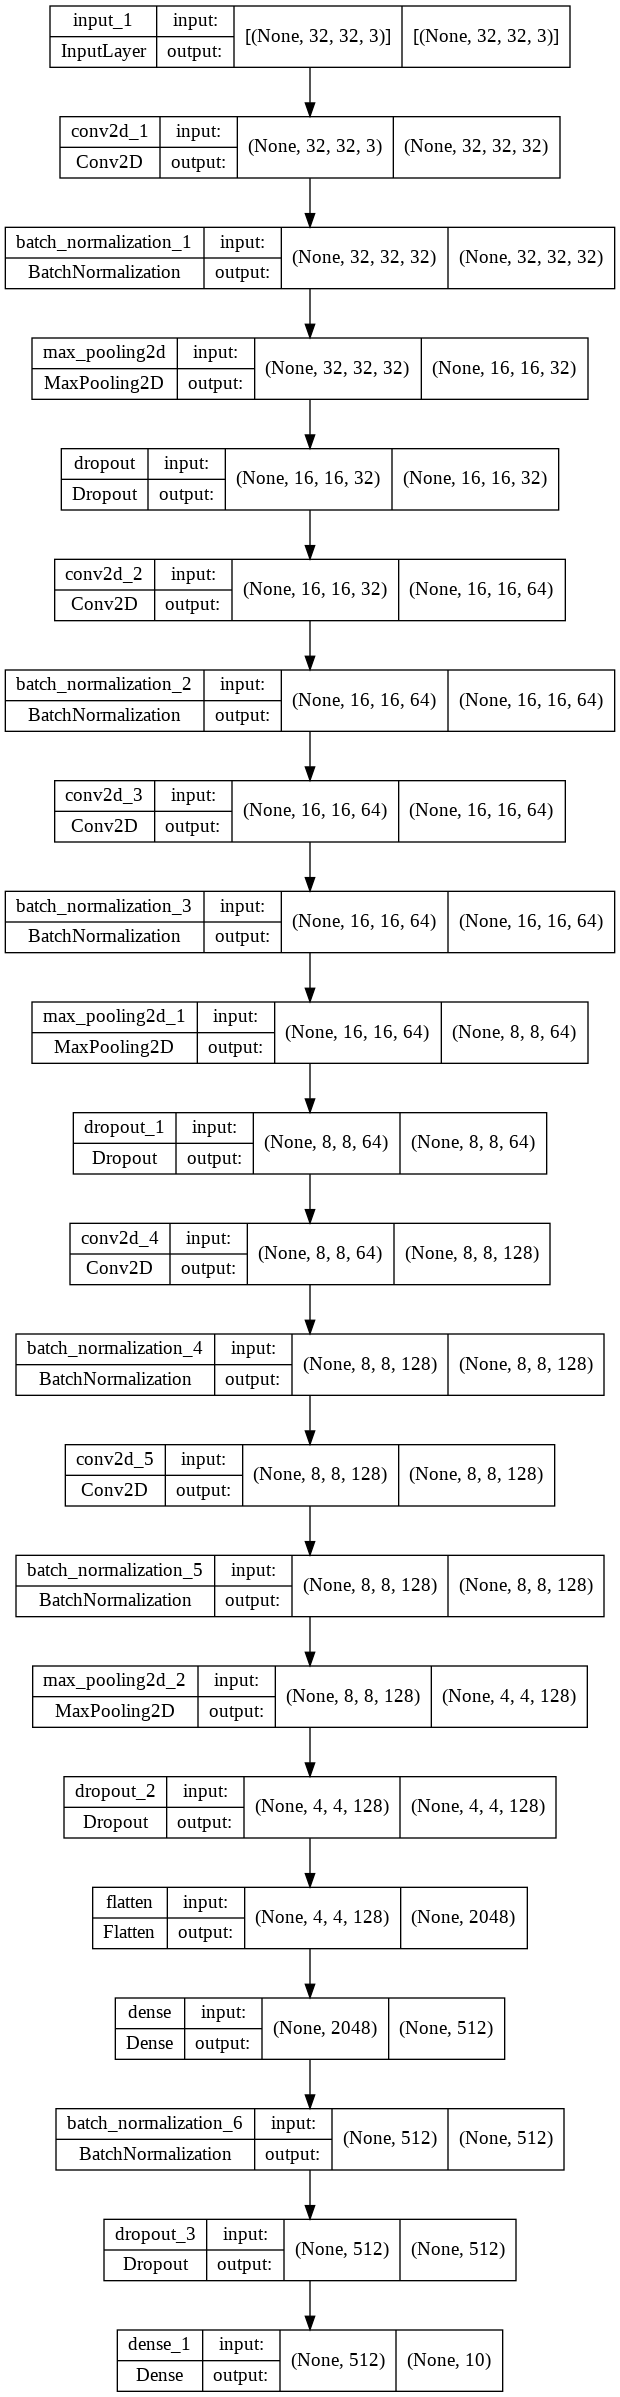

In [ ]:
dot_img_file = 'classifier_cifar.png'
tf.keras.utils.plot_model(classifier_cifar, to_file=dot_img_file, show_shapes=True)

In [8]:
def reCompile(classifier_cifar):
    classifier_cifar.trainable = False
    Input = l.Input(shape=(1,)) #Input neuron equal to 1
    hidden = l.Dense(512, activation="relu")(Input)
    hidden = l.Dense(32*32*3, activation="sigmoid")(hidden)
    output = l.Reshape((32, 32, 3))(hidden) #Outputs a 32x32x3 image

    #Create adversarial model
    advModel = m.Model(Input, output)
    advModel.compile(
        loss='mean_squared_error',
        optimizer=tf.optimizers.Adam(learning_rate=0.01),
        metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )

    #"Add" the classifier to the adversarial model
    wholeModel = m.Model(Input, classifier_cifar(output))
    wholeModel.compile(
        loss='categorical_crossentropy',
        optimizer=tf.optimizers.Adam(learning_rate=0.009),
        metrics=["accuracy"]
    )

    return advModel, wholeModel



100%|██████████| 1000/1000 [00:21<00:00, 45.71it/s]


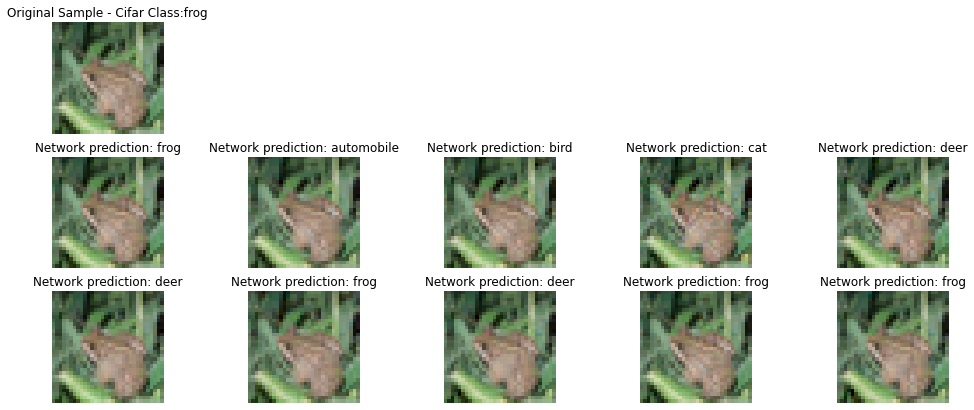

In [12]:
from tqdm import tqdm #progress meter
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create adversarial examples for the class frog (4th sample of test set) and plot them on a grid
x=x_test[4]
y=int(np.argmax(y_test[4]))

max_figure = plt.figure(figsize=(17,7))
rows = 3
columns = 5

max_figure.add_subplot(rows, columns, 1)
plt.imshow(x.reshape((32, 32, 3)))
plt.axis('off')
label = "Original Sample - Cifar Class:" + cifar_classes[y]
plt.title(label)

for one in range(10):
    advModel, wholeModel = reCompile(classifier_cifar)
    num = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    num[one] = 1

    for _ in tqdm(range(1000)):
        advModel.train_on_batch([np.array([1])], np.array([x])) # training of the adversarial model
        wholeModel.train_on_batch([np.array([1])], np.array([num,])) # training of the whole model
    advImage = advModel.predict([np.array([1])]).reshape(1, 32, 32, 3)
    activations = classifier_cifar(advImage.reshape(1, 32, 32, 3))
    prediction = np.argmax(activations)
    advModel, wholeModel = reCompile(classifier_cifar)

    #Image as list
    max_figure.add_subplot(rows, columns, one+6)
    label = "Network prediction: " + cifar_classes[int(prediction)]
    plt.imshow(advImage.reshape((32, 32, 3)))
    plt.axis('off')
    plt.title(label)
plt.show()